# **Customer Segmentation**

# Use Case

- Use Case Summary
- Objective Statement:
  * Get business insight about Revenue per member, Sessions per visitor, Average order value, Traffic, Visit per visitor and Add to cart rate (by country and by gender) per country in the first year of 2021.
  * To increase marketing efficiency by directing effort specifically toward the designated segment in a manner consistent with that segment’s characteristics.

- Methodology / Analytic Technique:
  * Descriptive analysis
  * Graph analysis
  * Segment Analysis

- Business Benefit:
  * Helping Business Development Team to create product differentiation based on the characteristic for each customer.
  * Know how to treat customer with specific criteria.

- Expected Outcome:
  * Know about Revenue per member, Sessions per visitor, Average order value, Traffic, Visit per visitor and Add to cart rate (by country and by gender)
  * Customer segmentation analysis.
  * Recommendation based on customer segmentation.








# Business Understanding

- Retail is the process of selling consumer goods or services to customers through multiple channels of distribution to earn a profit.
- This case has some business questions using the data:
- Revenue per member
- sessions per visitor
- Average order value
- Traffic
- Visit per visitor
- Add to cart rate (by country and by gender)

# Data Understanding

- Data of Retail Transaction from 01 January 2021 to 31 May 2021
- Data Dictionary:
- (1) Data: Transaction data from a fashion retail company in Canada.
    - orderId: Order (item) code.
    - MemberId: Member code.
    - id_discounted_order: 1 if the order is discounted.
    - Gross_revenue: Revenue of the order.
    - gross_revenue_before_discount	: Revenue before discount.
    - sum_units_sold: Number of nnits sold in the order.
    - sum_units_returned: Number of units returned in the order.
    

- (2) Data: Session data from a fashion retail website.
    - visitId: visiter unique code for each visit.
    - fullVisitorId: full visiter Code.
    - date: the date visitor visit the website.
    - memberId: Member code.
    - is_newsletter_subscriber: if the visitor is a newsletter subscriber.
    - newsletter_gender_communication_preference: gender predictions by newsletter.
    - country_from_ip: visitors come from Canada, US or other countries.
    - platform: visitors browse the website by website or iOS App
    - traffic_channel: affilliate, owned or paid for the traffic 
    - language_visit: lanuages used in the website.
    - orderId: order code if they have bought products.
    - sum_pdp_menswear_views: sum of "menswear" viewed.
    - sum_pdp_womenswear_views: sum of "womenswear" viewed.
    - sum_pdp_everythingelse_views: sum of "everythingelse" viewed.
    - sum_addtocart_menswear:sum of "menswear" added to cart.
    - sum_addtocart_womenswear: sum of "womenswear" added to cart.
    - sum_addtocart_everythingelse: sum of "everythingelse" added to cart.
    - sum_addtowishlist: sum of the products added to wishlist.

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import feature_engine
from feature_engine.outliers import Winsorizer

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

In [246]:
session = pd.read_csv("sessiondata.csv")
transaction = pd.read_csv("transactiondata.csv")

In [247]:
session.head(5)

,visitId,fullVisitorId,date,memberId,is_newsletter_subscriber,newsletter_gender_communication_preference,country_from_ip,platform,traffic_channel,language_visit,orderId,sum_pdp_menswear_views,sum_pdp_womenswear_views,sum_pdp_everythingelse_views,sum_addtocart_menswear,sum_addtocart_womenswear,sum_addtocart_everythingelse,sum_addtowishlist
0,3243274018916053492-1609526734,3243274018916050000,2021-01-01,196608,no,Womenswear,Canada,Website,Paid,English,NaN,3,0,0,0,0,0,0
1,3243274018916053492-1609546562,3243274018916050000,2021-01-01,196608,no,Womenswear,Canada,iOS App,Paid,English,NaN,1,0,0,0,0,0,0
2,3243274018916053492-1609685900,3243274018916050000,2021-01-03,196608,no,Womenswear,Canada,iOS App,Paid,English,NaN,0,0,0,0,0,0,0
3,3243274018916053492-1609693282,3243274018916050000,2021-01-03,196608,no,Womenswear,Canada,Website,Paid,English,NaN,1,0,0,0,0,0,0
4,3243274018916053492-1609702977,3243274018916050000,2021-01-03,196608,no,Womenswear,Canada,Website,Paid,English,NaN,0,0,0,0,0,0,0


In [248]:
transaction.head(5)

,date,orderId,member_Id,is_discounted_order,gross_revenue,gross_revenue_before_discount,sum_units_sold,sum_units_returned
0,2021-05-18,1152389539624,20792069,0,1492.086505,1492.086505,13,0
1,2021-01-15,1073058496294,25109761,0,1100.847779,1100.847779,9,0
2,2020-10-09,952533254524,46388481,0,671.233245,671.233245,12,0
3,2020-12-10,1028141327614,11022849,0,972.986814,972.986814,8,0
4,2021-02-15,1103154584224,39704321,0,849.546206,849.546206,10,0


In [249]:
transaction = transaction.rename(columns={'member_Id': 'memberId'})

In [250]:
len(session)

140180

In [251]:
len(transaction)

26262

In [252]:
session.isnull().sum()

visitId                                            0
fullVisitorId                                      0
date                                               0
memberId                                           0
is_newsletter_subscriber                           0
newsletter_gender_communication_preference         0
country_from_ip                                    0
platform                                           0
traffic_channel                                    0
language_visit                                     0
orderId                                       135608
sum_pdp_menswear_views                             0
sum_pdp_womenswear_views                           0
sum_pdp_everythingelse_views                       0
sum_addtocart_menswear                             0
sum_addtocart_womenswear                           0
sum_addtocart_everythingelse                       0
sum_addtowishlist                                  0
dtype: int64

There are more than 96% of orderId are null.

In [253]:
transaction.isnull().sum()

date                             0
orderId                          0
memberId                         0
is_discounted_order              0
gross_revenue                    0
gross_revenue_before_discount    8
sum_units_sold                   0
sum_units_returned               0
dtype: int64

There are 0.03% rows are null in the gross revenue before discount, but would not affect the analysis so we can leave it.

In [254]:
#timebound for transaction

print(transaction["date"].min())
print(transaction["date"].max())
print("The data is from 1.5 year transaction")

2020-01-01
2021-05-30
The data is from 1.5 year transaction


In [334]:
#timebound for session

print(session["date"].min())
print(session["date"].max())
print("The data is from 0.5 year transaction")

2021-01-01
2021-05-30
The data is from 1.5 year transaction


Since there are difference in timebound, we would omit the data before 2021-01-01.

In [255]:
#extract the timebound we want

transaction_2021 = transaction[transaction.date > '2020-12-31']

print(transaction_2021["date"].min())
print(transaction_2021["date"].max())
print("The data is from 0.5 year transaction")

2021-01-01
2021-05-30
The data is from 0.5 year transaction


In [335]:
# do left merge from session to transaction as all_df

all_df = pd.merge(transaction_2021,session,how = 'outer', on = "memberId")

In [257]:
all_df.isnull().sum()

date_x                                         33286
orderId_x                                      33286
memberId                                           0
is_discounted_order                            33286
gross_revenue                                  33286
gross_revenue_before_discount                  33401
sum_units_sold                                 33286
sum_units_returned                             33286
visitId                                            0
fullVisitorId                                      0
date_y                                             0
is_newsletter_subscriber                           0
newsletter_gender_communication_preference         0
country_from_ip                                    0
platform                                           0
traffic_channel                                    0
language_visit                                     0
orderId_y                                     376187
sum_pdp_menswear_views                        

In [258]:
all_df.nunique()

date_x                                           150
orderId_x                                       9585
memberId                                        5344
is_discounted_order                                2
gross_revenue                                   6204
gross_revenue_before_discount                   6509
sum_units_sold                                    24
sum_units_returned                                17
visitId                                       140048
fullVisitorId                                  24935
date_y                                           150
is_newsletter_subscriber                           2
newsletter_gender_communication_preference         2
country_from_ip                                    3
platform                                           2
traffic_channel                                    3
language_visit                                     2
orderId_y                                       3646
sum_pdp_menswear_views                        

# Exploratory Data Analysis

1a) Revenue per member in US, Canada and Others

In [259]:
Q1a = all_df[['memberId','gross_revenue','country_from_ip']]
Q1a = Q1a.drop_duplicates()
Q1a_1 = Q1a.groupby("country_from_ip").agg(
    {"memberId": pd.Series.nunique, "gross_revenue": np.sum})
revenue_per_member = Q1a_1.gross_revenue/Q1a_1.memberId
revenue_per_member

country_from_ip
Canada    782.449270
Others    723.658178
US        864.087934
dtype: float64

<AxesSubplot:xlabel='country_from_ip'>

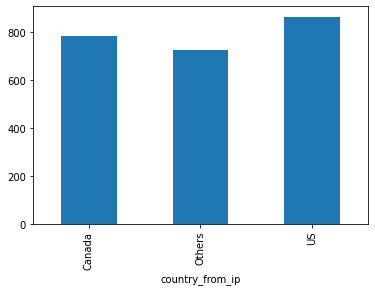

In [260]:
revenue_per_member.plot.bar()

1b) sessions per visitor in US, Canada and Others

In [261]:
Q1b = all_df[['visitId','sum_pdp_menswear_views','sum_pdp_womenswear_views','sum_pdp_everythingelse_views','country_from_ip']]
Q1b['session_men'] = Q1b.sum_pdp_menswear_views > 0
Q1b['session_women'] = Q1b.sum_pdp_womenswear_views > 0
Q1b['session_everything'] = Q1b.sum_pdp_everythingelse_views > 0

Q1b['session_men'] = Q1b['session_men'].astype(int)
Q1b['session_women'] = Q1b['session_women'].astype(int)
Q1b['session_everything'] = Q1b['session_everything'].astype(int)

Q1b['session_no'] = Q1b.session_men+Q1b.session_women+Q1b.session_everything

Q1b_1 = Q1b.groupby('country_from_ip').agg(
    {'visitId': pd.Series.nunique , 'session_no': np.sum}
)

sessions_per_visitor = Q1b_1.session_no/Q1b_1.visitId
sessions_per_visitor

/Users/tiffanylaw/opt/anaconda3/envs/pythonProject2/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


country_from_ip
Canada    2.313709
Others    1.588218
US        1.976264
dtype: float64

<AxesSubplot:xlabel='country_from_ip'>

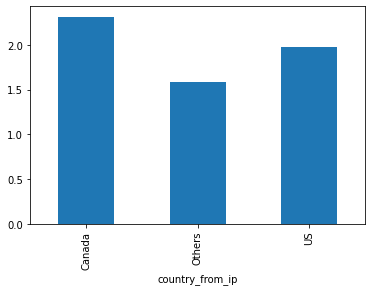

In [262]:
sessions_per_visitor.plot.bar()

1c) Average order value (AOV) in US, Canada and Others

In [263]:
#average order value (AOV) = revenue / # of order
Q1c = all_df[['orderId_x','gross_revenue','country_from_ip']]
Q1c = Q1c.drop_duplicates()
AOV = Q1c.groupby('country_from_ip').agg(
    {'orderId_x': pd.Series.nunique, 'gross_revenue':np.sum})
Q1c_1 = AOV.gross_revenue/AOV.orderId_x
Q1c_1


country_from_ip
Canada    407.522948
Others    480.164231
US        494.968864
dtype: float64

<AxesSubplot:xlabel='country_from_ip'>

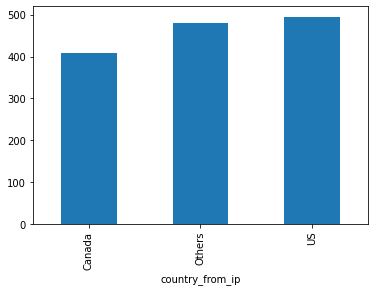

In [264]:
Q1c_1.plot.bar()

1d) Traffic in US, Canada and Others

In [265]:
#traffic is the number of visit times between 1/1/2021 and 31/5/2021
Q1d = all_df[['visitId','country_from_ip']]
Q1d_1 = Q1d.groupby('country_from_ip').visitId.count()
Q1d_1

country_from_ip
Canada    134171
Others     84557
US        176530
Name: visitId, dtype: int64

<AxesSubplot:xlabel='country_from_ip'>

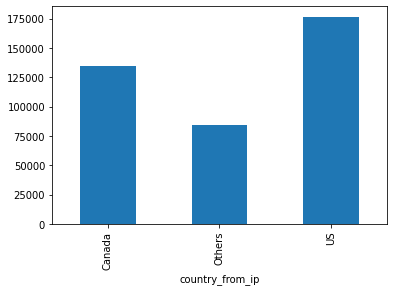

In [266]:
Q1d_1.plot.bar()

1e) visit per visitor in US, Canada and Others

In [267]:
#visit per visitor
Q1e = all_df[['visitId','country_from_ip']]
Q1e_1 = Q1e['visitId'].value_counts()
Q1e_1 = Q1e_1.to_frame(name = 'time_of_visiting')
Q1e_1 = Q1e_1.reset_index()
Q1e_1 = Q1e_1.rename(columns={'index': 'visitId'})
Q1e_2 = pd.merge(Q1e_1,Q1e,how='left', on = 'visitId')
Q1e_3 = Q1e_2.groupby('country_from_ip').agg(
    {'time_of_visiting': np.sum, 'visitId': pd.Series.count
    }
)
visit_per_visitor = Q1e_3.time_of_visiting/Q1e_3.visitId
visit_per_visitor

country_from_ip
Canada     7.059700
Others    11.783519
US         6.343024
dtype: float64

<AxesSubplot:xlabel='country_from_ip'>

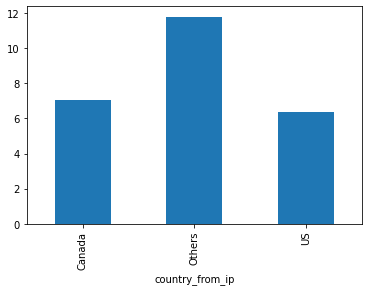

In [268]:
visit_per_visitor.plot.bar()

1f(i) Add to cart rate in US, Canada and Others

In [269]:
#Add to cart rate by countries
Q1f = all_df[['memberId','country_from_ip','newsletter_gender_communication_preference','sum_addtocart_menswear','sum_addtocart_womenswear','sum_addtocart_everythingelse']]
Q1f['addtocart_times'] = Q1f.sum_addtocart_menswear+Q1f.sum_addtocart_womenswear+Q1f.sum_addtocart_everythingelse
Q1f['add_to_cart_morethan1'] = Q1f.addtocart_times > 0
Q1f['add_to_cart_morethan1'] = Q1f['add_to_cart_morethan1'].astype(int)
Q1f_1 = Q1f.groupby('country_from_ip').agg(
    {'add_to_cart_morethan1':np.sum ,'memberId':pd.Series.count }
)
ATC_rate_country = Q1f_1.add_to_cart_morethan1/Q1f_1.memberId*100
ATC_rate_country


country_from_ip
Canada    15.674028
Others    17.330322
US        15.822240
dtype: float64

<AxesSubplot:xlabel='country_from_ip'>

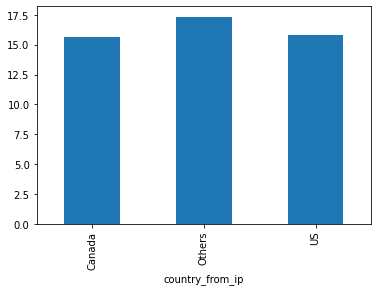

In [270]:
ATC_rate_country.plot.bar()

1f(ii) Add to cart rate in predict genders

In [271]:
#Add to cart rate by gender
Q1f_2 = Q1f.groupby('newsletter_gender_communication_preference').agg(
    {'add_to_cart_morethan1':np.sum ,'memberId':pd.Series.count }
)
ATC_rate_gender = Q1f_2.add_to_cart_morethan1/Q1f_2.memberId*100
ATC_rate_gender

newsletter_gender_communication_preference
Menswear      16.090604
Womenswear    16.096896
dtype: float64

In [273]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395258 entries, 0 to 395257
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   date_x                                      361972 non-null  object 
 1   orderId_x                                   361972 non-null  float64
 2   memberId                                    395258 non-null  int64  
 3   is_discounted_order                         361972 non-null  float64
 4   gross_revenue                               361972 non-null  float64
 5   gross_revenue_before_discount               361857 non-null  float64
 6   sum_units_sold                              361972 non-null  float64
 7   sum_units_returned                          361972 non-null  float64
 8   visitId                                     395258 non-null  object 
 9   fullVisitorId                               395258 non-null  int64  
 

# RFM Analysis

- Recency Frequency Monetary (RFM)

- RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who spend the most money.

- Recency — how long it’s been since a customer bought something from us.
- Frequency — how often a customer buys from us.
- Monetary value — the total value of purchases a customer has made.

In [274]:
transaction_2021.head()

,date,orderId,memberId,is_discounted_order,gross_revenue,gross_revenue_before_discount,sum_units_sold,sum_units_returned
0,2021-05-18,1152389539624,20792069,0,1492.086505,1492.086505,13,0
1,2021-01-15,1073058496294,25109761,0,1100.847779,1100.847779,9,0
4,2021-02-15,1103154584224,39704321,0,849.546206,849.546206,10,0
5,2021-05-14,1145902598644,19575299,0,601.335908,601.335908,11,0
6,2021-05-22,1157467264384,8225282,0,1222.306723,1222.306723,9,0


In [275]:
NOW = dt.date(2021,5,31) 
transaction_2021['date'] = pd.DatetimeIndex(transaction_2021.date).date

/Users/tiffanylaw/opt/anaconda3/envs/pythonProject2/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [276]:
#Recency

df_recency = transaction_2021.groupby(['memberId'],as_index=False)['date'].max()
df_recency.columns = ['memberId','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,memberId,Recency
0,6661,15
1,7428,51
2,11777,14
3,17408,36
4,17411,110


In [277]:
#Frequency - Monetarty

FM_Table = transaction_2021.groupby('memberId').agg({'orderId'   : pd.Series.count,
                                         'gross_revenue'  : np.sum })
FM_Table.rename(columns = {'orderId' :'Frequency',
                           'gross_revenue':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
memberId,,
6661,4,996.330562
7428,1,560.000000
11777,5,2017.000000
17408,2,1460.000000
17411,3,2593.995171


In [278]:
RFM_Table = df_recency.merge(FM_Table,left_on='memberId',right_on='memberId')
RFM_Table.head()

,memberId,Recency,Frequency,Monetary
0,6661,15,4,996.330562
1,7428,51,1,560.000000
2,11777,14,5,2017.000000
3,17408,36,2,1460.000000
4,17411,110,3,2593.995171


<AxesSubplot:>

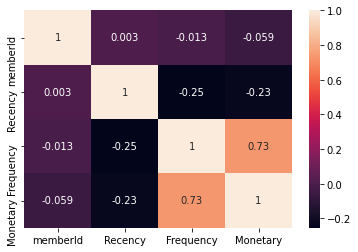

In [279]:
#Heatmap check
sns.heatmap(RFM_Table.corr(), annot=True)

A highlight in the above chart is customers with high frequency to the website tends to spend more money.

# Modeling Data: RFM Quantiles

- Now we split the metrics into segments using quantiles. 
- We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively. 
- 1 is the highest value, and 4 is the lowest value.
- A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

In [280]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [281]:
segmented_rfm = RFM_Table.copy()

In [282]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
RScore([1])

In [283]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,memberId,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,6661,15,4,996.330562,2,1,2
1,7428,51,1,560.000000,3,4,3
2,11777,14,5,2017.000000,1,1,1
3,17408,36,2,1460.000000,2,3,1
4,17411,110,3,2593.995171,3,2,1


Calculating the total RFM score combined.

RFM_Score = R_quartile + F_quartile + M_quartile

In [284]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [285]:
segmented_rfm.head()

,memberId,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,6661,15,4,996.330562,2,1,2,212
1,7428,51,1,560.000000,3,4,3,343
2,11777,14,5,2017.000000,1,1,1,111
3,17408,36,2,1460.000000,2,3,1,231
4,17411,110,3,2593.995171,3,2,1,321


In [286]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [287]:
segmented_rfm.head()

,memberId,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,6661,15,4,996.330562,2,1,2,212,5
1,7428,51,1,560.000000,3,4,3,343,10
2,11777,14,5,2017.000000,1,1,1,111,3
3,17408,36,2,1460.000000,2,3,1,231,6
4,17411,110,3,2593.995171,3,2,1,321,6


In [288]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  279
Loyal Customers:  755
Big Spenders:  846
Almost Lost:  29
Lost Customers:  175
Lost Cheap Customers:  289


In [289]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [290]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label

In [291]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Others                  1818
Loyal Customers          476
Big Spenders             317
Lost Cheap Customers     289
Best Customers           279
Lost Customers           175
Almost Lost               29
Name: Label, dtype: int64

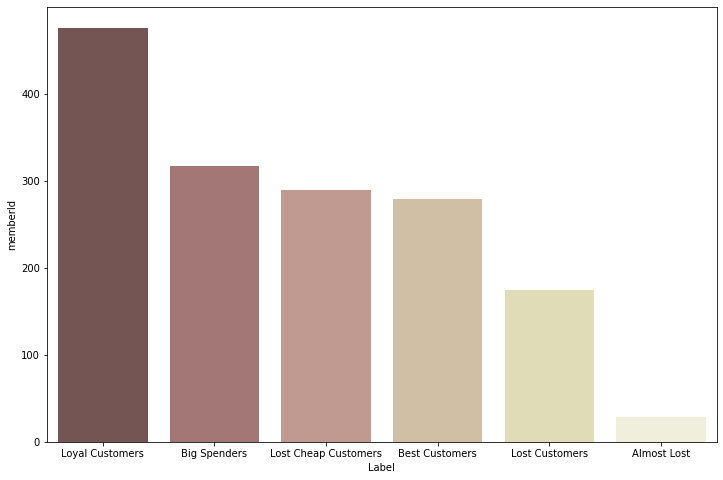

In [292]:
import seaborn as sns
sq1=segmented_rfm.groupby('Label')['memberId'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="Label", y="memberId", palette = "pink");

# Modeling Data: K-Means Clustering

K-Means clustering algorithm is an unsupervised machine learning algorithm that uses multiple iterations to segment the unlabeled data points into K different clusters in a way such that each data point belongs to only a single group that has similar properties.

In [293]:
RFM_Table_New = RFM_Table.drop('memberId', axis=1)

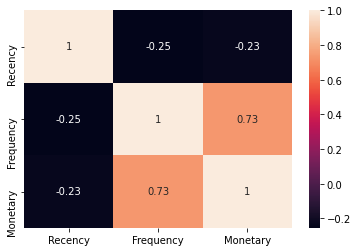

In [294]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);

<AxesSubplot:xlabel='Recency'>

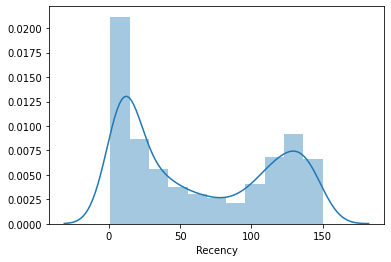

In [295]:
#Analyze distribution

sns.distplot(RFM_Table_New['Recency'])

<AxesSubplot:xlabel='Frequency'>

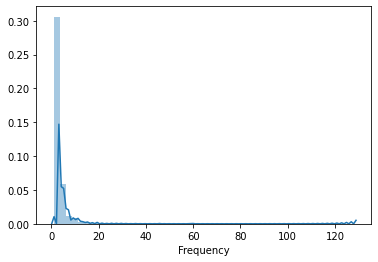

In [296]:
sns.distplot(RFM_Table_New['Frequency'])

<AxesSubplot:xlabel='Monetary'>

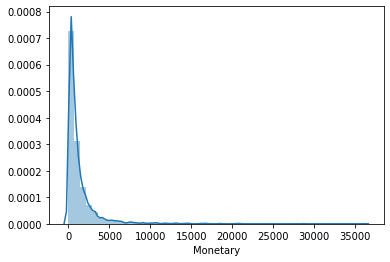

In [297]:
sns.distplot(RFM_Table_New['Monetary'])

- K-means gives the best result under the following conditions:
- Data’s distribution is not skewed.
- Data is standardised.

The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable. I added a small constant as log transformation demands all the values to be positive.

In [298]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,15,4,996.330562
1,51,1,560.000000
2,14,5,2017.000000
3,36,2,1460.000000
4,110,3,2593.995171


In [299]:
df_rfm_log = np.log(df_rfm_log+1)

In [300]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [301]:
df_rfm_log = windsoriser.transform(df_rfm_log)

In [302]:
#Developing preprocessing with StandardScaler

scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)

In [303]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=RFM_Table_New.columns)
RFM_Table_New_scaled.head()

,Recency,Frequency,Monetary
0,-0.746884,0.988493,0.356621
1,0.264955,-0.926962,-0.167810
2,-0.802288,1.369626,0.999015
3,-0.027204,-0.079360,0.704620
4,0.915920,0.522024,1.228232


<AxesSubplot:xlabel='Recency'>

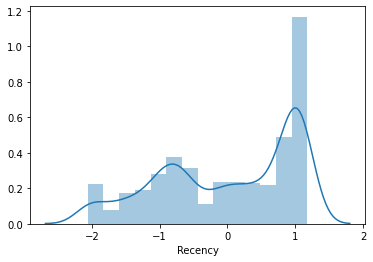

In [304]:
#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<AxesSubplot:xlabel='Frequency'>

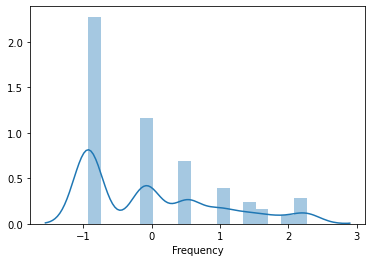

In [305]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<AxesSubplot:xlabel='Monetary'>

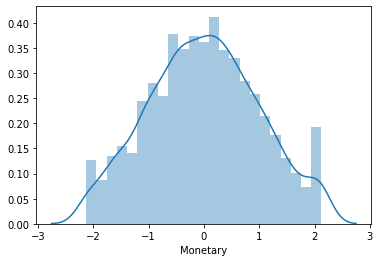

In [306]:
sns.distplot(RFM_Table_New_scaled['Monetary'])

In [307]:
X = np.asarray(RFM_Table_New_scaled)

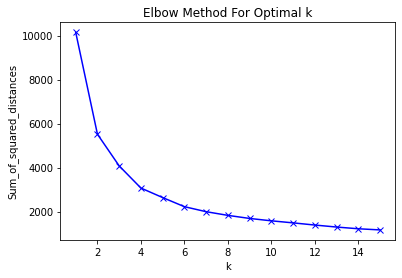

In [308]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [309]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

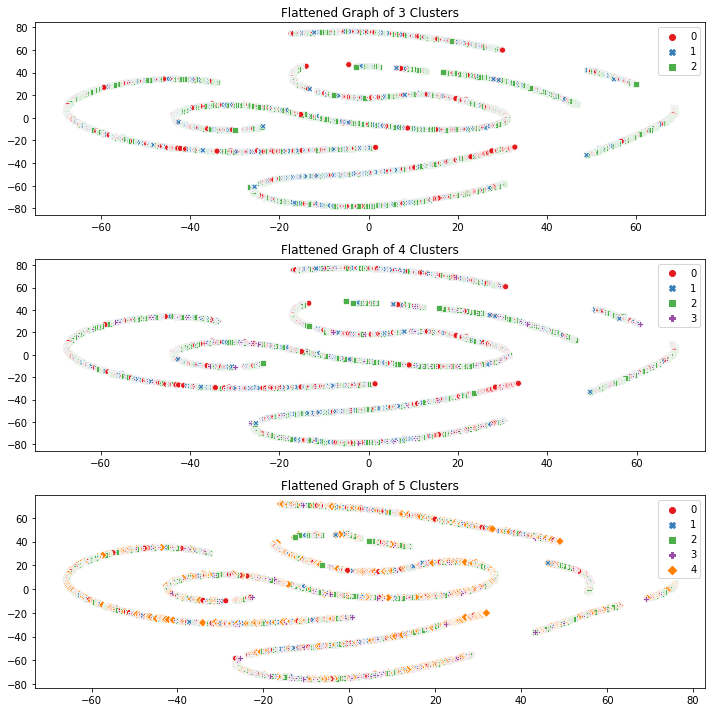

In [310]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, RFM_Table)

plt.tight_layout()


In [311]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=RFM_Table.index, 
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['memberId', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

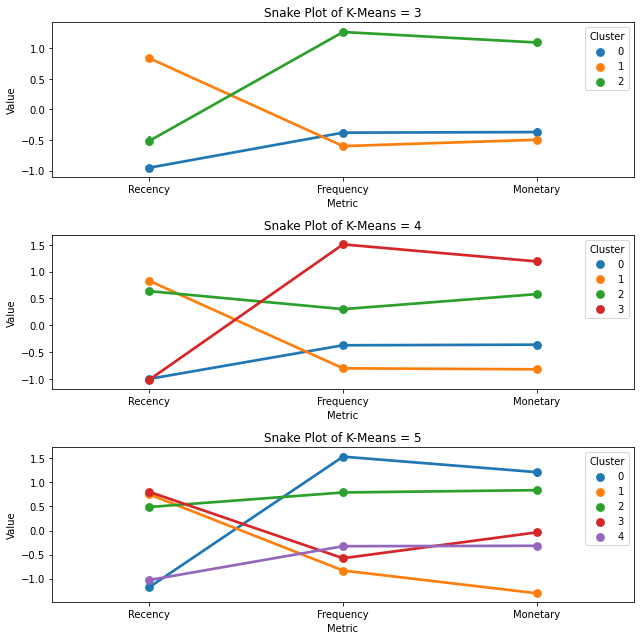

In [312]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_New_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_New_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_New_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

# Evaluating Model: K-Means Clustering

Davies Bouldin Score is a metric for evaluating clustering algorithms.
The smaller Davies Bouldin Score is The more optimal the cluster.


K-Means = 3

In [313]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [314]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0277223117036776


K-Means = 4

In [315]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [316]:
print(davies_bouldin_score(X, kmeans.labels_))

0.9073754284182016


K-Means = 5

In [317]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [318]:
print(davies_bouldin_score(X, kmeans.labels_))

0.9910430889153634


K-Means 4 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

In [319]:
df_rfm_k4.head()

,memberId,Recency,Frequency,Monetary,Cluster
0,6661,15,4,996.330562,3
1,7428,51,1,560.000000,1
2,11777,14,5,2017.000000,3
3,17408,36,2,1460.000000,2
4,17411,110,3,2593.995171,2


In [320]:
df_rfm_k4.Cluster.value_counts()

1    1153
2     789
0     786
3     655
Name: Cluster, dtype: int64

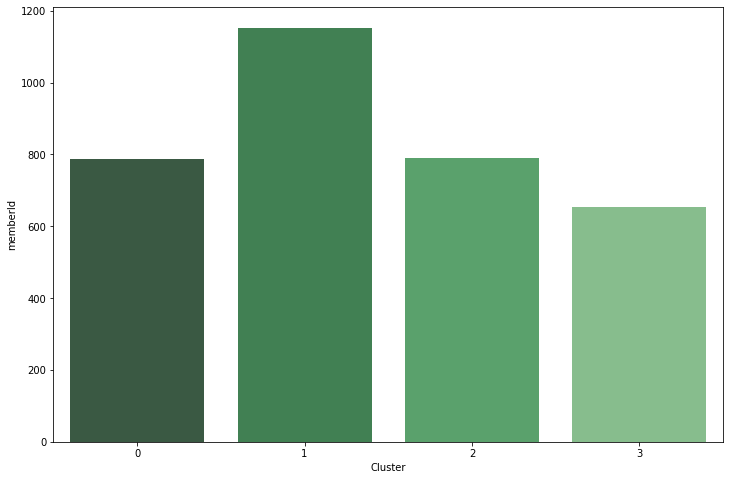

In [321]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['memberId'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="memberId", palette = "Greens_d");

Interpretation of the clusters formed using k-means.

In [322]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [323]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          13.0       2.0    580.0   786
1         107.0       1.0    340.0  1153
2          88.0       3.0   1522.0   789
3          15.0       7.0   3673.0   655

- "Cluster 0" has 23% customers. It belongs to the "Loyal Customers" segment as they Haven’t purchased for some time, but used to purchase frequently (F=2) and spent a lot. (R=3, F=2, M=2)

- "Cluster 1" has 34% customers. It can be interpreted as "Alomost Lost". They purchase recently (R=2). However they do not purchase frequently and do not spent a lot. (R=2, F=3, M=3)

- "Cluster 2" has 23% customers. It can be interpreted as "Lost Cheap Customers". Their last purchase is long ago (R=4), purchased very few (F=4) and spent little (M=4). (R=4, F=4, M=4)

- "Cluster 3" has 19% customers. It belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=1), frequent buyers (F=1), and spent the most (M=1). (R=1, F=1, M=1)